In [48]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qda
import myfunc as mf


In [49]:
# Import the dataset
data = pd.read_csv('exe_PCA.csv')

# Inspect the dataset
print(data.info())
print('')
print(data.head())

#CHIEDITI SE CONVIENE RIMUOVERE UNA COLONNA(n>1, p=1)!!!
#data.drop(columns=['X2'], inplace=True)
#oppure:
#data2=data.copy()
#data2.drop(columns=['X2'], inplace=True) #lo tolgo solo dalla copia e l'altra originale me la lascio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     15 non-null     float64
 1   X_2     15 non-null     float64
 2   X_3     15 non-null     float64
dtypes: float64(3)
memory usage: 488.0 bytes
None

         X_1        X_2        X_3
0  51.061808  49.330287  52.845428
1  53.380553  51.358194  52.615276
2  46.059252  46.607864  47.307960
3  51.642303  51.247238  52.089215
4  50.670225  50.434261  49.055578


In [50]:
mu_1=51
mu_2=50
mu_3=52
mu = pd.Series({'x1': mu_1, 'x2': mu_2, 'x3':mu_3})

In [51]:

std_1 = 1.483
std_2 = 1.435
std_3= 1.530
corr12 = 0.799
corr13=0.705
corr23= 0.683

#correlazione e std sono date, dobbiamo costruire la sigma da 

# Calculate the variance/covariance matrix
covariance12 = corr12 * std_1 * std_2 
covariance23= corr23 * std_3 * std_2 
covariance13= corr13 * std_3 * std_1

var_1 = std_1**2
var_2 = std_2**2
var_3=std_3**2

# define the covariance matrix as a pandas dataframe
SIGMA = pd.DataFrame([[var_1, covariance12,covariance13],
                [covariance12, var_2,covariance23],
                [covariance13,covariance23,var_3]],
                columns=['x1', 'x2','x3'],
                index=['x1', 'x2','x3'])


In [52]:
alpha_fam=0.01
alpha_single=0.01/3
k=stats.norm.ppf(1-alpha_single/2)

Number of points n = 15
Mean = 51.21


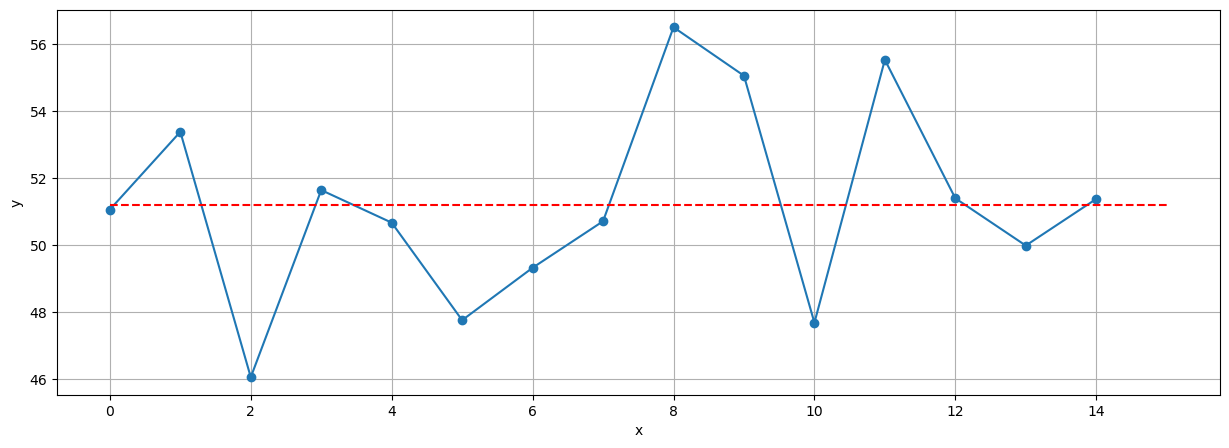

In [53]:
mf.single_ts_plot(data['X_1'])

Number of points n = 15
Mean = 50.06


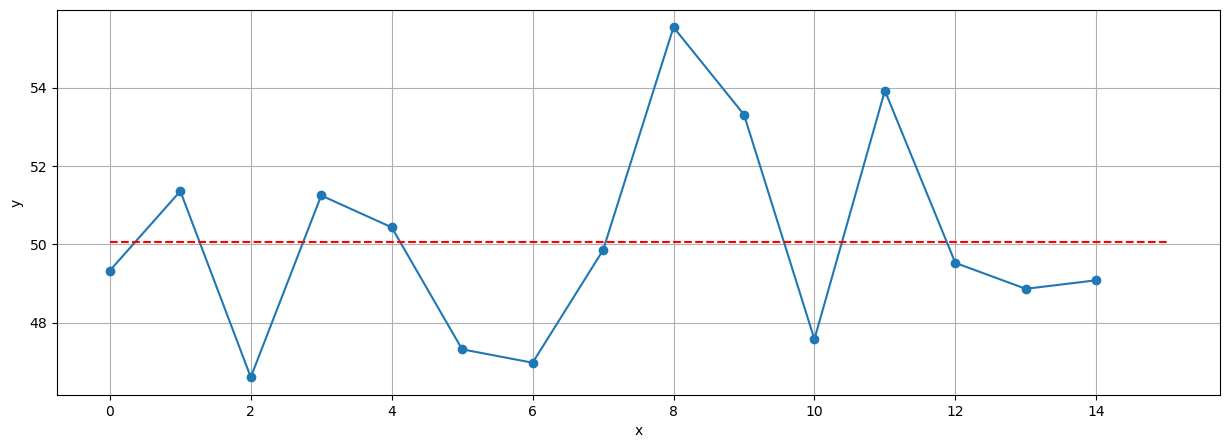

In [54]:
mf.single_ts_plot(data['X_2'])

Number of points n = 15
Mean = 51.92


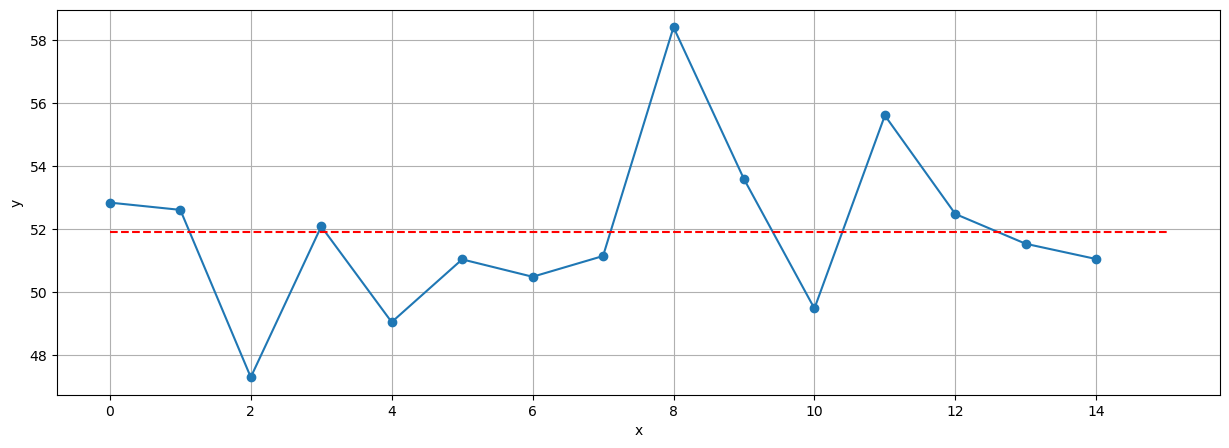

In [55]:
mf.single_ts_plot(data['X_3'])

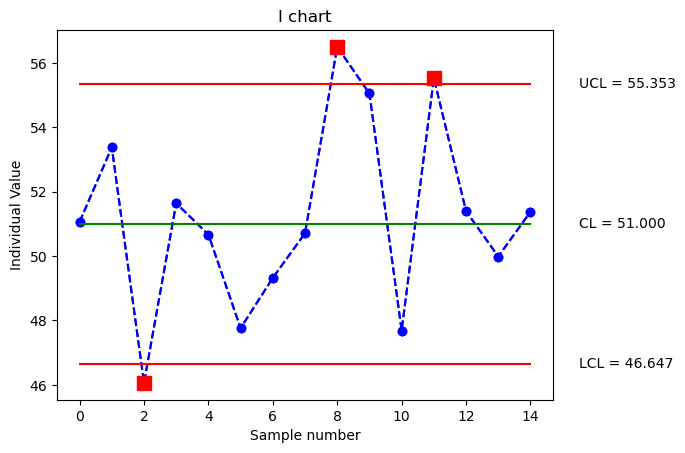

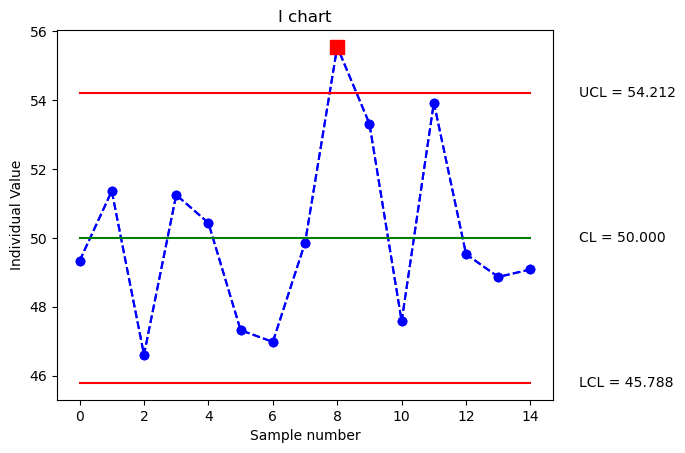

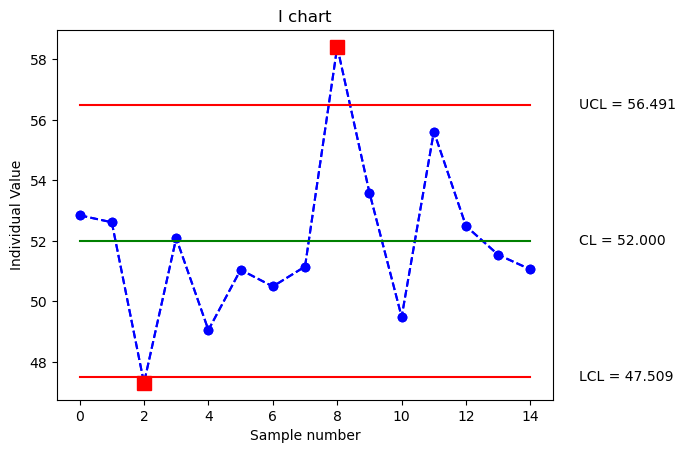

In [56]:
df_CC1=mf.IMR_my(data['X_1'],1,k,mu_1,std_1,'no','no')
df_CC2=mf.IMR_my(data['X_2'],1,k,mu_2,std_2,'no','no')
df_CC3=mf.IMR_my(data['X_3'],1,k,mu_3,std_3,'no','no')

Estimate and draw the operating characteristic curve of the control chart for 𝑥1 designed in point a) in 
the presence of a shift ∆𝜇1 of the mean of 𝑥1 with ∆𝜇1 ∈ [0,10], and report the value of the Type II 
error for ∆𝜇1 = 3.

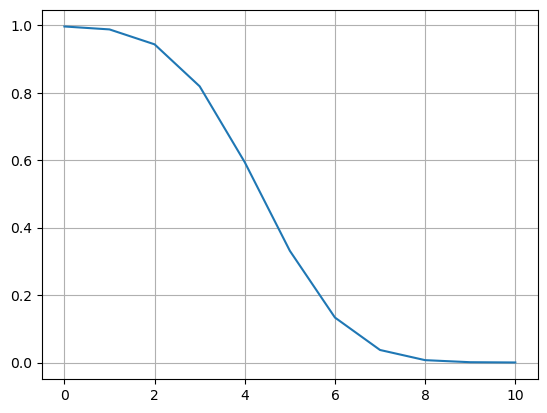

In [70]:
delta_abs=np.arange(0,11,1)
delta_piccolo=delta_abs/std_1
#ovviamente si mette il k_single!!!
beta=stats.norm.cdf(k-delta_piccolo*np.sqrt(1))-stats.norm.cdf(-k-delta_piccolo*np.sqrt(1))
plt.plot(delta_abs,beta)
plt.grid()
plt.show()

In [58]:
print(beta)

[9.96666667e-01 9.87963596e-01 9.43687118e-01 8.19187124e-01
 5.94045535e-01 3.31293328e-01 1.33358756e-01 3.71337108e-02
 6.96097032e-03 8.63439093e-04 7.00791161e-05]


In [59]:

u1=np.array([[-0.589],[-0.561],[-0.582]]) #eigenvector della prima pc (column vector)
lambda1=5.402


In [60]:
np.array(mu)

array([51, 50, 52], dtype=int64)

In [61]:

data_cent=data-np.array(mu)
scores_1=np.dot(data_cent, u1) # mxp x px1 = mx1, in python size: (m,1) eg. (50,1)
#lo flatteno se no dà problemi (da column np vector a normalissimo np array):
scores_1=(scores_1).flatten() # in python size: (m,) eg. (50,)

#se voglio un df
scores_df1=pd.DataFrame({'scores1': scores_1})


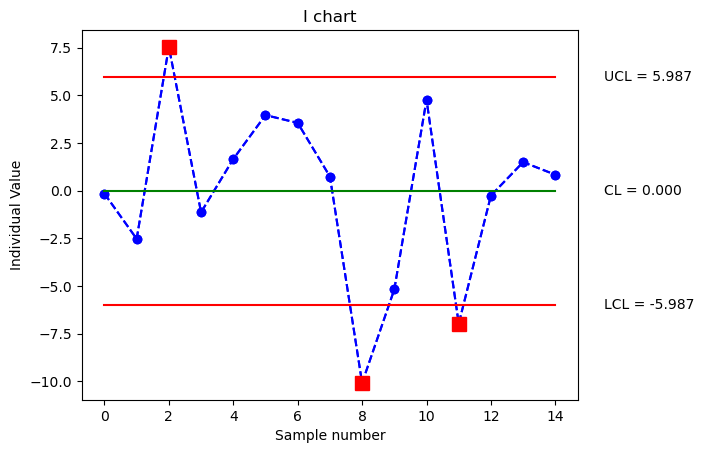

In [62]:
k_=stats.norm.ppf(1-alpha_fam/2) #qui ne faccio solo uno di CC quindi non c'è bisogno di Bonferroni
df_CC1=mf.IMR_my(scores_df1['scores1'],1,k_,0,np.sqrt(lambda1),'no','no')

Estimate and draw the operating characteristic curve of the control chart designed with the PC1 in the 
presence of a shift ∆𝜇1 of the mean of THE ORIGINAL variable 𝑥1 with ∆𝜇1 ∈ [0,10], and report the value of the Type 
II error for ∆𝜇1 = 3. Compare this result with the one in point b) and discuss the difference

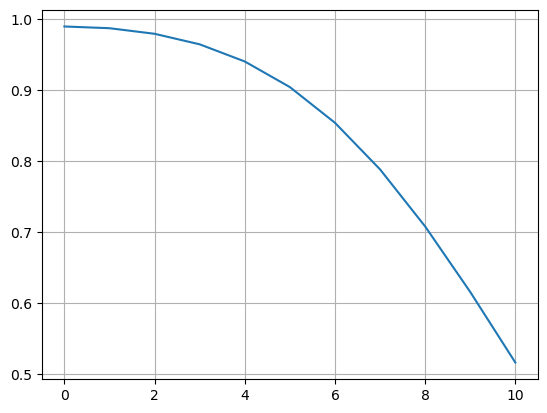

In [67]:
#la questione qui è leggermente più delicata perchè dobbiamo riportare lo shift della variabile x1 originale
#allo shift della PC1
#se c'è shift della x1 allora mu_H1=[mu1+delta1,mu2,mu3]
#la mu_H1 della pc1 chiaramente non sarà pari a mu1+delta1, ma sarà pari all'expected value 
#della combinazione lineare che dà la PC1 sotto H1, ma sapendo già che per le altre 2 variabili
#andiamo a 0 visto che sono centrate allora l'expected value della pc1 sotto H1:
#mu_pc1_h1=E[(x1_h1-mu1)*a1]=E[x1_h1]-E[mu1]*a1=(mu1+delta1)*a1-mu1*a1=delta1*a1 (si annulla il resto)

#quindi devo moltiplicare al delta1 il coefficiente della PC1 relazionato a X1

delta1=np.arange(0,11,1)
a1=-0.589
delta_piccolo=delta1/np.sqrt(lambda1)
beta=stats.norm.cdf(k_-delta_piccolo*a1*np.sqrt(1))-stats.norm.cdf(-k_-delta_piccolo*a1*np.sqrt(1))
plt.plot(delta1,beta)
plt.grid()
plt.show()


In [68]:
print(beta)
#si vede che il beta per un delta assoluto pari a 3 è peggiorato (0.96 vs 0.81) e lo è in generale ovviamente

[0.99       0.98756171 0.97970084 0.96485732 0.94070873 0.9046276
 0.85433938 0.78868809 0.70831769 0.61602708 0.51660944]


In case the shift affects the mean of one single variable, the control chart on the first PC is less effective than 
applying univariate control charts on the original variables. The reason is that the first PC is a basically a 
mean of the three variables (remind: 𝒖1 = [−0.589,−0.561,−0.582]𝑇), and hence the deviation on one 
signal variable is mitigated by the weight in the linear combination.  
